In [1]:
#%% Libraries
import pandas as pd
import warnings
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import resample
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV as RFECV_SKYLEARN
pd.options.display.max_columns = 100
#pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [2]:
#Open File
albert = pd.read_csv('C:/Users/user/Documents/1. GitHub/Albert_Einstein/data.csv')
# Order categories
categories = pd.Categorical(albert['target'], categories=['low', 'med', 'high'], ordered=True)
categories
# Label your target with numerical values
labels, unique = pd.factorize(categories, sort=True)
albert['target'] = labels

['med', 'med', 'med', 'med', 'med', ..., 'high', 'high', 'high', 'high', 'high']
Length: 10000
Categories (3, object): ['low' < 'med' < 'high']

In [3]:
#%% Model
from pycaret.classification import *
clf1 = setup(data = albert, target = 'target'
             , silent = True
             , log_experiment = True, experiment_name = 'rain_tomorrow_exp'
             , log_plots = True, log_profile = True, log_data = True
             #, profile = True #, profile_kwargs = True
             , train_size = 0.3
             #, sampling = True
             , numeric_imputation = 'median', categorical_imputation = 'constant'
             , normalize = True, normalize_method = 'zscore'
             , handle_unknown_categorical = True, unknown_categorical_method = 'most_frequent'
             , fix_imbalance = True
             , transformation = True, transformation_method = 'yeo-johnson'
             , combine_rare_levels = True, rare_level_threshold = 0.1
             , feature_selection = True, feature_selection_threshold = 0.8
             , remove_multicollinearity = True, multicollinearity_threshold = 0.95
             , pca = False
             , ignore_low_variance = True
             , fold_strategy = 'stratifiedkfold'
             , fold = 10
             , use_gpu = False
              )

logs = get_logs(save=True)

allDone()

,Description,Value
0,session_id,5481
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(10000, 4)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
data = seasoned_rain.sample(frac=0.95, random_state=786)
data_unseen = seasoned_rain.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))
logs = get_logs(save=True)

allDone()

In [10]:
# return best model
best = compare_models()  #default is 'Accuracy'
allDone()
print(best)
allDone()

save_model(best, 'best')
logs = get_logs(save=True)
allDone()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.4390,0.4993,0.3329,0.4664,0.4505,-0.0005,-0.0005,0.1240
rf,Random Forest Classifier,0.4273,0.4929,0.3285,0.4660,0.4439,-0.0020,-0.0021,0.1610
dt,Decision Tree Classifier,0.4033,0.4981,0.3264,0.4656,0.4276,-0.0015,-0.0018,0.0110
lightgbm,Light Gradient Boosting Machine,0.3960,0.5093,0.3306,0.4733,0.4254,0.0065,0.0067,0.1710
xgboost,Extreme Gradient Boosting,0.3797,0.4970,0.3264,0.4581,0.4071,-0.0125,-0.0129,0.5990
svm,SVM - Linear Kernel,0.3780,0.0000,0.3396,0.4711,0.3740,0.0096,0.0083,0.0180
knn,K Neighbors Classifier,0.3733,0.4965,0.3298,0.4639,0.4048,-0.0034,-0.0037,0.0100
ridge,Ridge Classifier,0.3513,0.0000,0.3510,0.4766,0.3866,0.0128,0.0147,0.0100
lr,Logistic Regression,0.3510,0.5100,0.3504,0.4767,0.3864,0.0126,0.0145,0.0180
lda,Linear Discriminant Analysis,0.3510,0.5100,0.3504,0.4763,0.3863,0.0124,0.0143,0.0060


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5481, verbose=0,
                     warm_start=False)


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

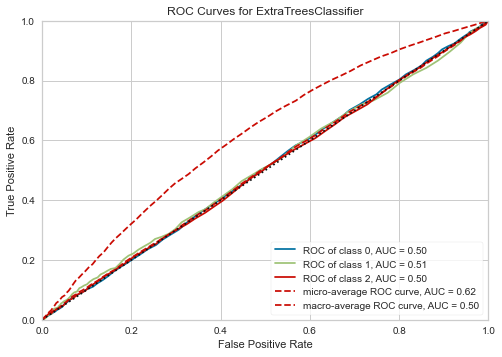

In [11]:
model_best = create_model(best,fold = 10)
plot_model(model_best)

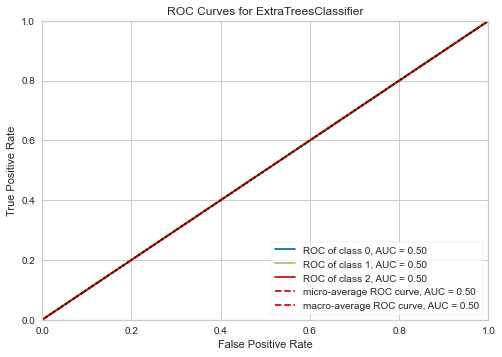

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight='balanced', criterion='gini',
                                       max_depth=7, max_features='log2',
                                       max_leaf_

In [12]:
tuned_model = tune_model(model_best, n_iter = 50)
allDone()
plot_model(tuned_model)
allDone()

save_model(tuned_model, 'tuned_model')
logs = get_logs(save=True)
allDone()

In [13]:
plot_model(tuned_model, plot = 'parameter')
allDone()
logs = get_logs(save=True)

allDone()

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,balanced
criterion,gini
max_depth,7
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.3
min_impurity_split,None


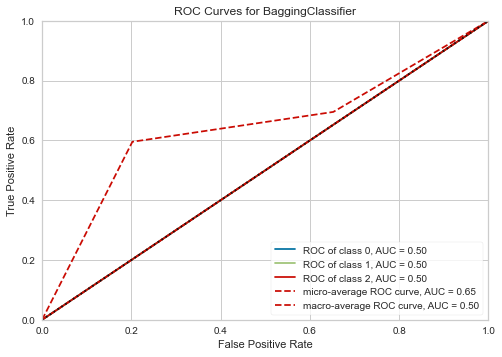

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=False, random_state=1055107916, verbose=0,
                     warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=Fals

(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                        min_impurity_split=None,
                                                                        min_samples_leaf=3,
                                                                        min_samples_s

In [14]:
# With Bagging
bagged_tuned_model = ensemble_model(tuned_model, method = 'Bagging', n_estimators = 10) # n_estimators = 100
allDone()
plot_model(bagged_tuned_model)
allDone()
print(bagged_tuned_model.estimators_)

save_model(bagged_tuned_model, 'bagged_tuned_model')
allDone()
logs = get_logs(save=True)

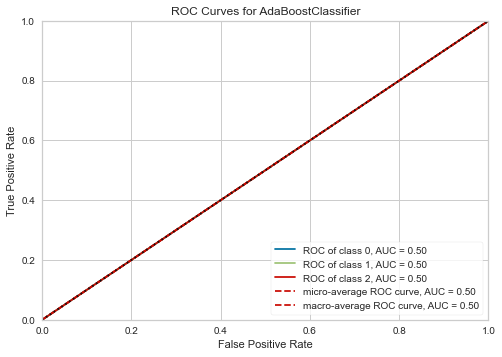

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=False, random_state=1555427058, verbose=0,
                     warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=Fals

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                         criterion='gini',
                                                                         max_depth=7,
                                                                         max_features='log2',
   

In [15]:
# With Boosting
boosted_tuned_model = ensemble_model(tuned_model, method = 'Boosting', n_estimators = 10) # n_estimators = 100
allDone()
plot_model(boosted_tuned_model)
allDone()
print(boosted_tuned_model.estimators_)
allDone()
logs = get_logs(save=True)

save_model(boosted_tuned_model, 'boosted_tuned_model')
allDone()
logs = get_logs(save=True)

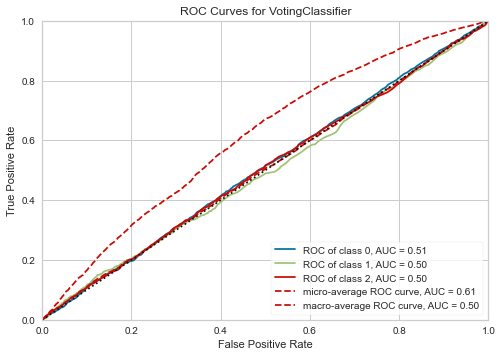

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5481, verbose=0,
                     warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=F

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                       class_weight=None,
                                                                       criterion='gini',
                                                                       max_depth=None,
        

In [16]:
# Blend Models
blender = blend_models(top3)
plot_model(blender)
allDone()
print(blender.estimators_)
allDone()

save_model(blender, 'blender')
allDone()
logs = get_logs(save=True)

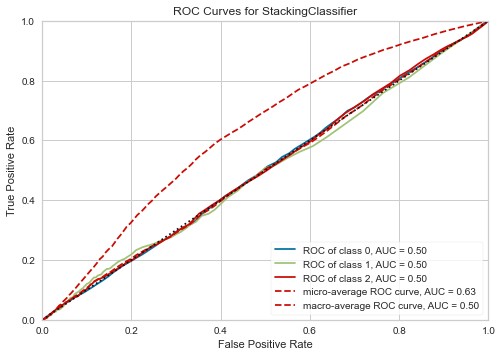

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5481, verbose=0,
                       warm_start=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5481, splitter='best')]


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                          max_depth=None,
                                                                          max_features='auto',
                                                                          max_leaf_nodes=

In [17]:
# Stack Model
stacker_top3 = stack_models(estimator_list = top3[1:], meta_model = top3[0], restack = True)
allDone()
plot_model(stacker_top3)
allDone()
print(stacker_top3.estimators_)
allDone()


save_model(stacker_top3, 'stacker_top3')
allDone()
logs = get_logs(save=True)

In [22]:
calibrated_tuned_model = calibrate_model(tuned_model)
allDone()
logs = get_logs(save=True)

save_model(calibrated_tuned_model, 'calibrated_tuned_model')
logs = get_logs(save=True)
allDone()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6133,0.5000,0.3333,0.3762,0.4663,0.0000,0.0000
1,0.6133,0.5000,0.3333,0.3762,0.4663,0.0000,0.0000
2,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
3,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
4,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
5,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
6,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
7,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
8,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
9,0.1033,0.5000,0.3333,0.0107,0.0194,0.0000,0.0000


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                             max_features='log2',
                                                                             max_leaf_nodes=None,
                                                                             m

In [23]:
calibrated_bagged_tuned_model = calibrate_model(bagged_tuned_model)
allDone()
logs = get_logs(save=True)

save_model(calibrated_tuned_model, 'calibrated_tuned_model')
logs = get_logs(save=True)
allDone()



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2867,0.5000,0.3333,0.0822,0.1277,0.0000,0.0000
1,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
2,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
3,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
4,0.1000,0.5000,0.3333,0.0100,0.0182,0.0000,0.0000
5,0.2900,0.5000,0.3333,0.0841,0.1304,0.0000,0.0000
6,0.2900,0.5000,0.3333,0.0841,0.1304,0.0000,0.0000
7,0.2900,0.5000,0.3333,0.0841,0.1304,0.0000,0.0000
8,0.2900,0.5000,0.3333,0.0841,0.1304,0.0000,0.0000
9,0.2867,0.5000,0.3333,0.0822,0.1277,0.0000,0.0000


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                             max_features='log2',
                                                                             max_leaf_nodes=None,
                                                                             m

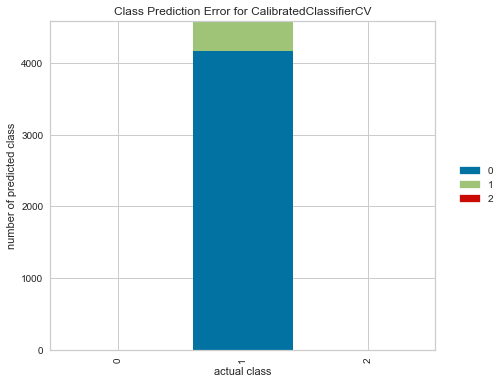

In [26]:
plot_model(calibrated_bagged_tuned_model, plot='error')

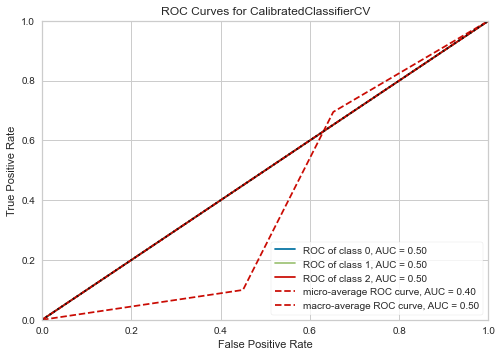

In [27]:
plot_model(calibrated_bagged_tuned_model)

In [30]:
pred_holdout_calibrated_bagged_tuned_model = predict_model(calibrated_bagged_tuned_model)  #, probability_threshold = 0.0754)
allDone()

save_model(pred_holdout_calibrated_bagged_tuned_model, 'pred_holdout_calibrated_bagged_tuned_model')
logs = get_logs(save=True)
allDone()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.0999,0,0.3333,0.0100,0.0181,0.0000,0.0000


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
 2     1.698643 -0.656308 -0.373629      2      1  0.3333
 3    -1.704676 -0.568311  1.551795      2      1  0.3333
 4     0.431833 -0.440817 -0.363101      2      1  0.3333
 ...        ...       ...       ...    ...    ...     ...
 6995  1.223096 -1.455394 -0.211803      0

In [33]:
#%% Predict on your Unseen Data
data = albert.sample(frac=0.95, random_state=786)
data_unseen = albert.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))
data_unseen

Data for Modeling: (9500, 4)
Unseen Data For Predictions (500, 4)


,x1,x2,x3,target
0,34.86,7.86,-47.64,1
1,15.13,9.67,-37.22,1
2,18.28,3.85,-43.69,1
3,5.50,24.23,-45.81,1
4,76.97,8.30,-25.64,1
...,...,...,...,...
495,9.52,3.59,-19.32,2
496,24.00,5.25,-22.56,2
497,85.92,2.89,-4.30,2
498,22.87,4.84,-9.08,2


In [34]:
predictions = predict_model(calibrated_bagged_tuned_model, data = data_unseen)

In [35]:
predictions

,x1,x2,x3,target,Label,Score
0,34.86,7.86,-47.64,1,1,0.3333
1,15.13,9.67,-37.22,1,1,0.3333
2,18.28,3.85,-43.69,1,1,0.3333
3,5.50,24.23,-45.81,1,1,0.3333
4,76.97,8.30,-25.64,1,1,0.3333
...,...,...,...,...,...,...
495,9.52,3.59,-19.32,2,1,0.3333
496,24.00,5.25,-22.56,2,1,0.3333
497,85.92,2.89,-4.30,2,1,0.3333
498,22.87,4.84,-9.08,2,1,0.3333


In [36]:
predictions.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,500.0,43.34562,26.481380,-12.6100,20.6425,43.1400,65.1050,91.3900
x2,500.0,8.99878,5.219866,0.8400,4.9650,7.9100,11.5825,28.1600
x3,500.0,-24.91972,20.388537,-59.8900,-42.9775,-24.9950,-7.8450,9.9900
target,500.0,0.71200,0.895914,0.0000,0.0000,0.0000,2.0000,2.0000
Label,500.0,1.00000,0.000000,1.0000,1.0000,1.0000,1.0000,1.0000
Score,500.0,0.33330,0.000000,0.3333,0.3333,0.3333,0.3333,0.3333


In [38]:
predictions['Label'].value_counts()

1    500
Name: Label, dtype: int64